# Install Libraries

In [ ]:
%pip install segment-geospatial groundingdino-py leafmap localtileserver
%pip install -q git+https://github.com/huggingface/transformers.git
%pip install datasets

# Import Dependencies

In [35]:
from datasets import Dataset, load_dataset
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from tqdm import tqdm
import torch
from PIL import Image
import io
import leafmap
from samgeo import tms_to_geotiff, split_raster
from samgeo.text_sam import LangSAM

In [15]:
from google.colab import output
output.enable_custom_widget_manager()

In [3]:
sidewalk_test = load_dataset("back2classroom/sidewalks", split='val', streaming=True)

Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
sam = LangSAM()

In [27]:
text_prompt = "tree"

In [117]:
dir = "/content/drive/MyDrive/Colab Notebooks/gdrive_test"
sidewalk_images = []

if os.path.exists(dir):
    # Get a list of all files in the directory
    files = os.listdir(dir)

    # Create a list of full paths to each file
    for file in files:
        full_path = os.path.join(dir, file)
        sidewalk_images.append(full_path)
sidewalk_images.sort()

#split_raster(sidewalk_images[3], out_dir="sidewalk_tiles", tile_size=(1000, 1000), overlap=0)

In [118]:
text_prompt = "tree"

In [ ]:
sam.predict_batch(
    images=sidewalk_images[:10],
    out_dir="sidewalk_masks",
    text_prompt=text_prompt,
    box_threshold=0.40,
    text_threshold=0.40,
    mask_multiplier=255,
    dtype="uint8",
    merge=False,
    verbose=True,
)

Image Path:  /content/drive/MyDrive/Colab Notebooks/gdrive_test/1016_11_14.tif


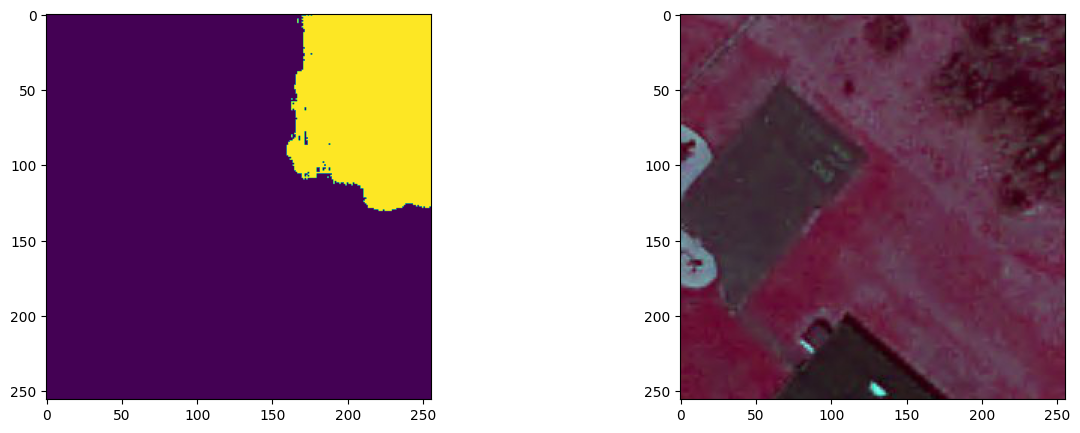

In [135]:
tif_path = "/content/sidewalk_masks/1016_11_14_mask.tif"
ind = 14
image_path = sidewalk_images[ind]
#for i, image in enumerate(sidewalk_images[10:20]):
#  print(i, ": ", image)

mask_image = Image.open(tif_path)
original_image = Image.open(image_path)
print("Image Path: ", sidewalk_images[ind])

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(mask_image)
axes[1].imshow(original_image)
plt.show()

Image Path:  /content/drive/MyDrive/Colab Notebooks/gdrive_test/1016_10_14.tif


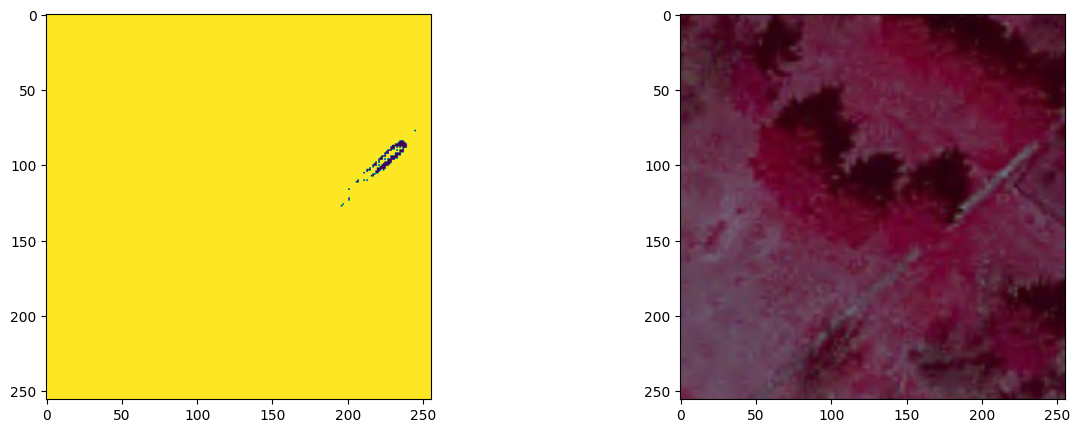

In [152]:
tif_path = "/content/sidewalk_masks/1016_10_14_mask.tif"
ind = 4
image_path = sidewalk_images[ind]

mask_image = Image.open(tif_path)
original_image = Image.open(image_path)
print("Image Path: ", sidewalk_images[ind])

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(mask_image)
axes[1].imshow(original_image)
plt.show()

Image Path:  /content/drive/MyDrive/Colab Notebooks/gdrive_test/1016_10_3.tif


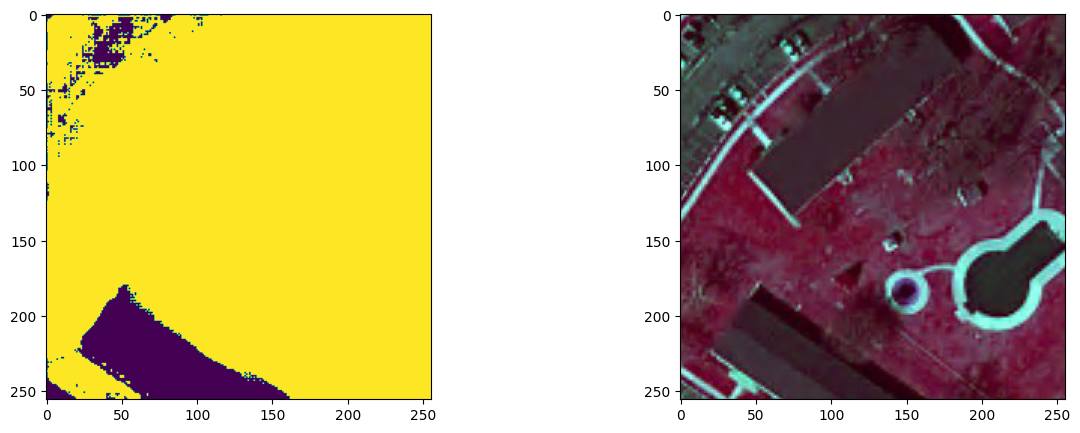

In [155]:
# both prompt and bbox thresholds lowered to 30 for this mask
tif_path = "/content/sidewalk_masks/1016_10_3_mask.tif"
ind = 7
image_path = sidewalk_images[ind]

mask_image = Image.open(tif_path)
original_image = Image.open(image_path)
print("Image Path: ", sidewalk_images[ind])

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(mask_image)
axes[1].imshow(original_image)
plt.show()

Image Path:  /content/drive/MyDrive/Colab Notebooks/gdrive_test/1016_13_20.tif


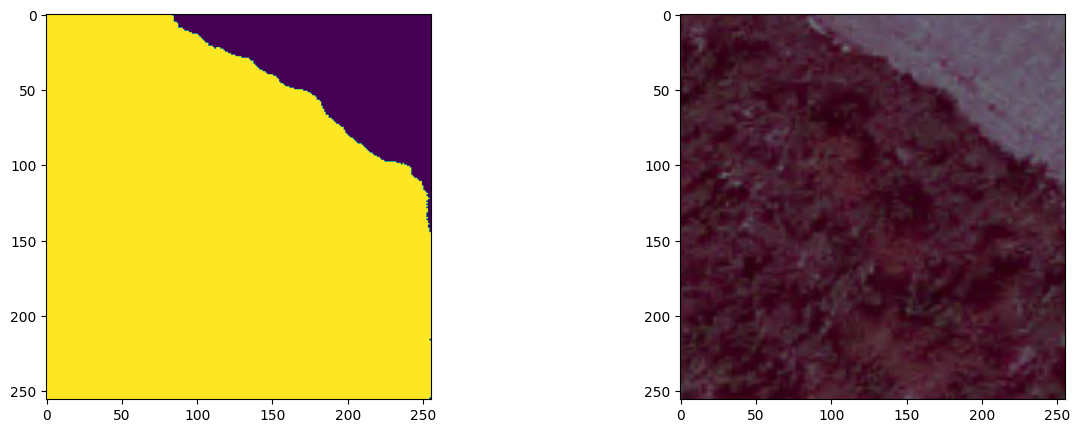

In [142]:
tif_path = "/content/sidewalk_masks/1016_13_20_mask.tif"
ind = 39
image_path = sidewalk_images[ind]
#for i, image in enumerate(sidewalk_images[10:20]):
#  print(i, ": ", image)

mask_image = Image.open(tif_path)
original_image = Image.open(image_path)
print("Image Path: ", sidewalk_images[ind])

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(mask_image)
axes[1].imshow(original_image)
plt.show()